<a href="https://colab.research.google.com/github/cindylozano/DataScienceTLG/blob/TensorFlow/DS_C7_SC3_CINDYLOZANO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto | Generación de un modelo inteligente de clasificación con redes neuronales profundas para la detección de amenazas aéreas ✈️

## Contexto

####Objetivos:  

El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando los siguientes pasos:  

+ Preparar una base de datos y generar los conjuntos de entrenamiento y prueba.
+ Diseñar un modelo utilizando una red neuronal convolucional desde cero y determinar sus hiperparámetros.
+ Diseñar un modelo utilizando una red neuronal convolucional utilizando un modelo pre-entrenado.
+ Generar un modelo utilizando la herramienta Teachable Machine.
+ Validar, evaluar y comparar los tres diferentes modelos generados y seleccionar el mejor considerando la exactitud como indicador de desempeño.
+ Exportar los modelos generados para poder utilizarlos dentro de Colab o algún otro destino.

####Introducción:  

Actualmente la industria, gobierno y organizaciones tienen la necesidad de generar modelos inteligentes para diversos propósitos. En este caso en particular, ayudarás a proteger al mundo desarrollando el modelo que mejor funcione para integrarlo al sistema de seguridad y poder detectar intrusos y ataques dentro del perímetro de una base que desarrolla una vacuna para curar la plaga zombi que atormenta al mundo.

Trabajarás con una base de datos que contiene 8530 imágenes de diferentes dimensiones de 6 clases diferentes: misil, jet, helicóptero, dron, cohete y avión en formatos jpeg, jpg, png, entre otros. Por lo tanto, tendrás que encargarte de preparar la base de datos de imágenes para poder generar los modelos que se requieren.

####Instrucciones:

Para poder solucionar exitosamente este reto, necesitarás llevar a cabo los siguientes pasos:  

1. Descarga la siguiente base de datos
2. Extrae los archivos de la carpeta comprimida y sube los directorios a Google Drive para poder trabajar con ellos.
3. Genera un cuaderno de Python en Google Colab para solucionar el reto.
4. Preprocesa la base de datos por poder trabajar con ella.
5. Genera los conjuntos de entrenamiento y prueba y haz un proceso de aumento de datos.
6. Genera tres modelos:

  a) El primer modelo debes diseñarlo desde cero creando la arquitectura y configurando los hiperparámetros utilizando aumento de datos.

  b) El segundo modelo debes construirlo utilizando un modelo pre-entrenado.

  c) El tercer modelo lo debes generar utilizando la herramienta Teachable Machine y exportándolo para poder cargarlo en tu cuaderno para compararlo.
7. Exporta los tres modelos creados.
8. Realiza una comparativa de desempeño para seleccionar el mejor modelo.
9. Diseña una arquitectura de red neuronal profunda desde cero creando la arquitectura y configurando los hiperparámetros.
10. Entrena y ajusta la red neuronal profunda diseñada y al final exporta el modelo generado.
11. Diseña una arquitectura de red neuronal profunda utilizando un modelo pre-entrenado.
12. Entrena y ajusta la red neuronal profunda diseñada y al final exporta el modelo.
13. Genera un modelo utilizando la herramienta Teachable Machine utilizando solamente el conjunto de entrenamiento y al final exporta el modelo.
14. Importa los tres modelos generados y compara su desempeño usando el conjunto de prueba y el valor de exactitud.
15. Selecciona el mejor modelo de acuerdo con su desempeño.
16. Guarda todos los bloques de código que utilizaste, así como los resultados y salidas obtenidas en tu cuaderno de Google Colab donde trabajaste con la solución al reto. Asegúrate de dejar todas las ejecuciones de cada celda visibles.
17. Nombra tu archivo siguiendo la nomenclatura que se te indica en Formato de entrega de la actividad.
18. Dale permisos al archivo para que podamos evaluarlo (Opción: “Anyone with the link” en inglés, o “Cualquier persona que tenga el vínculo” en español).
19. Copia y publica únicamente la liga a tu libreta de Google Colab presionando el ícono ➕ ubicado en la parte inferior de la pantalla de plataforma.

## Preparar una base de datos y generar los conjuntos de entrenamiento y prueba.

Las imágenes corresponden a 6 clases diferentes:
+ misil
+ jet
+ helicóptero
+ dron
+ cohete
+ avión

En total son 8,530 imágenes en la base de datos.

In [1]:
# Importar plataformas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import pathlib
import os

In [ ]:
# Directorio base
DIR_BASE = '/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos'
DIR_BASE = pathlib.Path(DIR_BASE)

In [ ]:
# Subdirectorios
DIR_MISIL = DIR_BASE/'misil'
DIR_JET = DIR_BASE/'jet'
DIR_HELICOPTERO = DIR_BASE/'helicoptero'
DIR_DRON = DIR_BASE/'dron'
DIR_COHETE = DIR_BASE/'cohete'
DIR_AVION = DIR_BASE/'avion'

In [ ]:
# Función para enlistar las extensiones de un directorio
def obtener_extension_archivos(DIR):
  ext = []
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)

# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL)
obtener_extension_archivos(DIR_JET)
obtener_extension_archivos(DIR_HELICOPTERO)
obtener_extension_archivos(DIR_DRON)
obtener_extension_archivos(DIR_COHETE)
obtener_extension_archivos(DIR_AVION)

{'.aspx', '.webp', '.png', '.cms', '.jpg', '.JPG', '.jpeg', '.gif', '.JPEG', '.5', '.PNG', '.ashx'}
{'.axd', '.aspx', '.webp', '.png', '.php', '.jpg', '.JPG', '.jpeg', '.gif', '.img', '.5', '.PNG', '.66dc5b9c87', '.jp2'}
{'.dpg', '.axd', '.aspx', '.webp', '.png', '.php', '.jpg', '.JPG', '.jpeg', '.gif', '.jfif', '.img', '.PNG', '.cls', '.ashx'}
{'.webp', '.png', '.cms', '.php', '.jpg', '.JPG', '.jpeg', '.gif', '.5', '.PNG', '.ashx'}
{'.axd', '.aspx', '.php', '.png', '.cms', '.webp', '.jpg', '.JPG', '.jpeg', '.img', '.gif', '.PNG', '.66dc5b9c87'}
{'.aspx', '.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.bin', '.2'}


In [ ]:
# Función para filtrar las imágenes
def imagen_valida(archivo, extensiones=None):
    if extensiones is None:
        extensiones = [".jpg", ".jpeg", ".png", ".gif", ".webp", ".bmp"]
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    es_archivo = os.path.isfile(archivo)
    es_imagen = ext_archivo.lower() in extensiones
    if es_archivo and es_imagen:
        try:
            with Image.open(archivo) as img:
                img.verify()
            return True
        except (IOError, SyntaxError):
            return False
    return False

In [ ]:
# Crear un nuevo directorio para almacenar imágenes válidas
DIR_FILTRADO = DIR_BASE/'filtrado'
DIR_FILTRADO.mkdir(exist_ok=True)
print("Directorio filtrado creado en:", DIR_FILTRADO)

Directorio filtrado creado en: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado


In [ ]:
# Aplicar el filtro a cada archivo en los subdirectorios
for subdir in DIR_BASE.iterdir():
    if subdir.is_dir():  # Asegurarse de que solo se procesen subdirectorios
        # Crear subdirectorios correspondientes en "filtrado"
        subdir_filtrado = DIR_FILTRADO / subdir.name
        subdir_filtrado.mkdir(exist_ok=True)

        for archivo in subdir.iterdir():
            # Validar si el archivo es una imagen válida
            if imagen_valida(archivo):
                # Mover o copiar la imagen válida al subdirectorio filtrado
                destino = subdir_filtrado / archivo.name
                if not destino.exists():  # Evitar sobrescribir archivos
                    archivo.rename(destino)  # Usar `rename` para mover el archivo

In [ ]:
# Validar extensiones de nuevos directorios

# Subdirectorios con el sufijo _FILTRADO
DIR_MISIL_FILTRADO = DIR_FILTRADO/'misil'
DIR_JET_FILTRADO = DIR_FILTRADO/'jet'
DIR_HELICOPTERO_FILTRADO = DIR_FILTRADO/'helicoptero'
DIR_DRON_FILTRADO = DIR_FILTRADO/'dron'
DIR_COHETE_FILTRADO = DIR_FILTRADO/'cohete'
DIR_AVION_FILTRADO = DIR_FILTRADO/'avion'

# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.JPEG', '.PNG'}
{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.webp', '.png', '.jpg', '.JPG', '.jpeg', '.gif'}


In [ ]:
# Función para convertir imágenes WEBP a JPEG
def convertir_webp_a_jpeg(directorio):
    for subdir in directorio.iterdir():
        if subdir.is_dir():  # Procesar subdirectorios
            for archivo in subdir.iterdir():
                if archivo.suffix.lower() == ".webp":
                    try:
                        # Abrir la imagen en WEBP
                        with Image.open(archivo) as img:
                            # Convertir a modo RGB (requerido para JPEG)
                            img = img.convert("RGB")
                            # Guardar como JPEG
                            archivo_jpeg = archivo.with_suffix(".jpg")
                            img.save(archivo_jpeg, "JPEG", quality=95)
                            print(f"Convertido: {archivo} -> {archivo_jpeg}")
                            # Eliminar la imagen original WEBP
                            archivo.unlink()
                    except Exception as e:
                        print(f"Error al convertir {archivo}: {e}")

# Llamar a la función
convertir_webp_a_jpeg(DIR_FILTRADO)

Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000576.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000576.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000936.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000936.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001007.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001007.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001224.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001224.jpg
Convertido: /content/dri

In [ ]:
# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

{'.png', '.jpg', '.JPG', '.jpeg', '.gif', '.JPEG', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.gif', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.gif'}


In [ ]:
# Función para convertir imágenes GIF a JPEG
def convertir_gif_a_jpeg(directorio):
    for subdir in directorio.iterdir():
        if subdir.is_dir():  # Procesar subdirectorios
            for archivo in subdir.iterdir():
                if archivo.suffix.lower() == ".gif":
                    try:
                        # Abrir la imagen en GIF
                        with Image.open(archivo) as img:
                            # Convertir a modo RGB (requerido para JPEG)
                            img = img.convert("RGB")
                            # Guardar como JPEG
                            archivo_jpeg = archivo.with_suffix(".jpg")
                            img.save(archivo_jpeg, "JPEG", quality=95)
                            print(f"Convertido: {archivo} -> {archivo_jpeg}")
                            # Eliminar la imagen original GIF
                            archivo.unlink()
                    except Exception as e:
                        print(f"Error al convertir {archivo}: {e}")

# Llamar a la función
convertir_gif_a_jpeg(DIR_FILTRADO)

Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000720.gif -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000720.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/cohete/00000326.gif -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/cohete/00000326.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/cohete/00000482.gif -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/cohete/00000482.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000439.gif -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000439.jpg
Convertido: 

In [ ]:
# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

{'.png', '.jpg', '.JPG', '.jpeg', '.JPEG', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.PNG'}
{'.png', '.jpg', '.JPG', '.jpeg', '.PNG'}
{'.jpg', '.JPG', '.jpeg', '.png'}


In [ ]:
# Normalizar extensiones de imágenes
def normalizar_extensiones(directorio):
    for subdir in (directorio).iterdir():
        if subdir.is_dir():
            for archivo in subdir.iterdir():
                try:
                    with Image.open(archivo) as img:
                        formato_real = img.format.lower()
                        ext_correcta = f".{formato_real}"
                        if archivo.suffix.lower() != ext_correcta:
                            nuevo_archivo = archivo.with_suffix(ext_correcta)
                            archivo.rename(nuevo_archivo)
                            print(f"Renombrado: {archivo} -> {nuevo_archivo}")
                except Exception as e:
                    print(f"Error con {archivo}: {e}")

# Llamar a la función
normalizar_extensiones(DIR_FILTRADO)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Renombrado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000835.jpg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000835.jpeg
Renombrado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000822.jpg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000822.jpeg
Renombrado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000816.jpg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000816.jpeg
Renombrado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000815.jpg -> /content/drive/MyDrive/Colab N

In [ ]:
# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

{'.mpo', '.JPEG', '.jpeg', '.png'}
{'.jpeg', '.PNG', '.png'}
{'.jpeg', '.PNG', '.webp', '.png'}
{'.jpeg', '.PNG', '.png'}
{'.jpeg', '.png'}
{'.mpo', '.jpeg', '.webp', '.png'}


In [ ]:
# Llamar a la función
convertir_webp_a_jpeg(DIR_FILTRADO)

# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000553.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000553.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001126.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001126.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000507.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000507.jpg
Convertido: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000648.webp -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00000648.jpg


In [ ]:
# Función para eliminar archivos con extensión .mpo
def eliminar_archivos_mpo(directorio):
    for subdir in (directorio).iterdir():
        if subdir.is_dir():
            for archivo in subdir.iterdir():
                if archivo.suffix.lower() == ".mpo":
                    try:
                        archivo.unlink()  # Eliminar el archivo
                        print(f"Eliminado: {archivo}")
                    except Exception as e:
                        print(f"Error al eliminar {archivo}: {e}")

# Llamar a la función
eliminar_archivos_mpo(DIR_FILTRADO)

Eliminado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00000629.mpo
Eliminado: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/misil/00000978.mpo


In [ ]:
# Obtener extensiones de los directorios
obtener_extension_archivos(DIR_MISIL_FILTRADO)
obtener_extension_archivos(DIR_JET_FILTRADO)
obtener_extension_archivos(DIR_HELICOPTERO_FILTRADO)
obtener_extension_archivos(DIR_DRON_FILTRADO)
obtener_extension_archivos(DIR_COHETE_FILTRADO)
obtener_extension_archivos(DIR_AVION_FILTRADO)

{'.JPEG', '.jpeg', '.png'}
{'.jpeg', '.PNG', '.png'}
{'.jpg', '.jpeg', '.PNG', '.png'}
{'.jpeg', '.PNG', '.png'}
{'.jpeg', '.png'}
{'.jpg', '.jpeg', '.png'}


In [ ]:
# Contar imágenes válidas
conteo_img = len(list(DIR_FILTRADO.glob('*/*.*')))
conteo_img

8493

In [39]:
DIR_FILTRADO = '/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado'
DIR_FILTRADO= pathlib.Path(DIR_FILTRADO)

# Establecer del tamaño de lote e imágenes
tam_lote = 32
alto_img = 224
ancho_img = 224

# Generar el conjunto de entrenamiento
conj_entrenamiento = tf.keras.preprocessing.image_dataset_from_directory(
DIR_FILTRADO,
validation_split=0.2,
subset="training",
seed=53,
image_size=(alto_img, ancho_img),
batch_size=tam_lote)

# Generar el conjunto de prueba
conj_prueba = tf.keras.preprocessing.image_dataset_from_directory(
DIR_FILTRADO,
validation_split=0.2,
subset="validation",
seed=53,
image_size=(alto_img, ancho_img),
batch_size=tam_lote)

Found 8493 files belonging to 6 classes.
Using 6795 files for training.
Found 8493 files belonging to 6 classes.
Using 1698 files for validation.


In [40]:
# Obtener los nombres de las etiquetas
nombre_clases = conj_entrenamiento.class_names
print(nombre_clases)

['avion', 'cohete', 'dron', 'helicoptero', 'jet', 'misil']


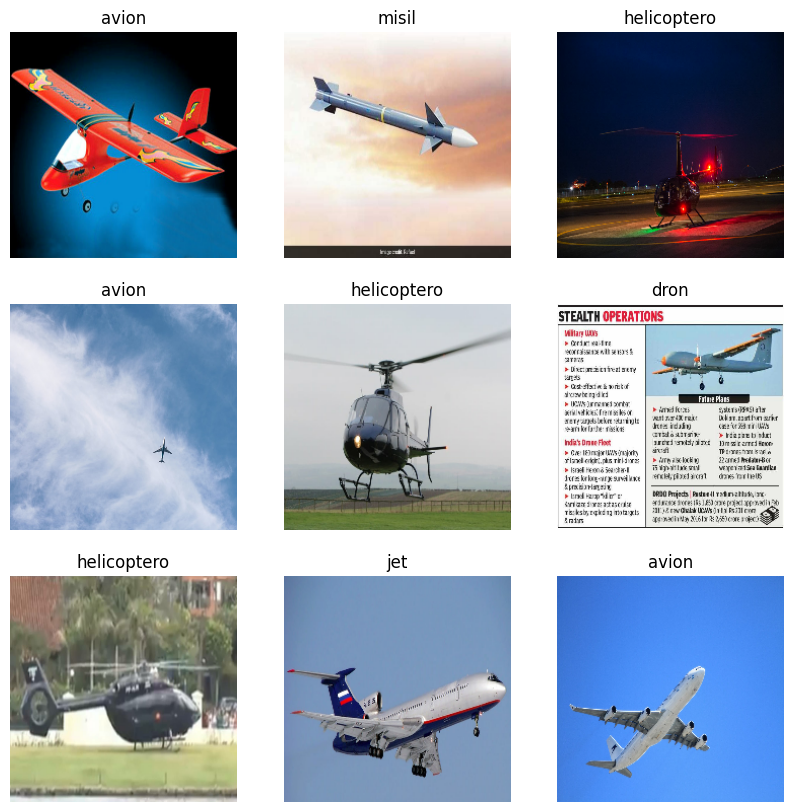

In [5]:
# Visualizar una muestra de los datos
plt.figure(figsize=(10, 10))
for img, etiquetas in conj_entrenamiento.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(nombre_clases[etiquetas[i]])
    plt.axis("off")

In [6]:
# Validar el tamaño de los tensores de las imágenes y de las etiquetas
for lote_img, lote_etq in conj_entrenamiento:
  print(lote_img.shape)
  print(lote_etq.shape)
  break

(32, 224, 224, 3)
(32,)


In [7]:
# Generar objeto para procesar aumento de datos
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30,  # rotación aleatoria de la imágenes en un rango de (0 a 30)
                                                          zoom_range = 0.05, # acercamiento aleatorio dentro de la imagen
                                                          width_shift_range=0.1,  # desplazamiento  horizontal aleatorio
                                                          height_shift_range=0.1,  # desplazamiento vertical aleatorio
                                                          horizontal_flip=True,  # volteo horizontal de las imágenes
                                                          vertical_flip=True,  # volteo vertical de las imágenes
                                                          channel_shift_range=0.5   #modificación aleatorio de los valores RGB de la imagen
)

## Diseñar un modelo utilizando una red neuronal convolucional desde cero y determinar sus hiperparámetros.

### Intento 1: entrenamiento sin proceso de aumento de datos

In [8]:
# Generar la arquitectura de la red
redConv = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(alto_img,ancho_img,3)), # capa de entrada (con normalización y shape de los pixeles)
    tf.keras.layers.Conv2D(32,(5,5),activation='relu',padding='valid'), # inician capas de extracción de patrones locales
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(), # capa de aplanamiento
    tf.keras.layers.Dense(512, activation="relu"), # inician capas densas de clasificación
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6,activation='softmax') # capa de salida (considera 6 clases)
])

redConv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 96)        5

In [ ]:
# Entrenar el modelo sin aumento de datos
redConv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
evolucion = redConv.fit(conj_entrenamiento, validation_data=conj_prueba, epochs=100,batch_size=32)

Epoch 1/100
213/213 [==============================] - 100s 462ms/step - loss: 1.7114 - accuracy: 0.2696 - val_loss: 1.6286 - val_accuracy: 0.3168
Epoch 2/100
213/213 [==============================] - 96s 450ms/step - loss: 1.5689 - accuracy: 0.3444 - val_loss: 1.5641 - val_accuracy: 0.3457
Epoch 3/100
213/213 [==============================] - 96s 448ms/step - loss: 1.4545 - accuracy: 0.4065 - val_loss: 1.5224 - val_accuracy: 0.3834
Epoch 4/100
213/213 [==============================] - 97s 451ms/step - loss: 1.2723 - accuracy: 0.4943 - val_loss: 1.5808 - val_accuracy: 0.3869
Epoch 5/100
213/213 [==============================] - 96s 450ms/step - loss: 0.9687 - accuracy: 0.6281 - val_loss: 1.9157 - val_accuracy: 0.3757
Epoch 6/100
213/213 [==============================] - 97s 451ms/step - loss: 0.6308 - accuracy: 0.7586 - val_loss: 2.4973 - val_accuracy: 0.3769
Epoch 7/100
213/213 [==============================] - 97s 452ms/step - loss: 0.4004 - accuracy: 0.8462 - val_loss: 3.1127 

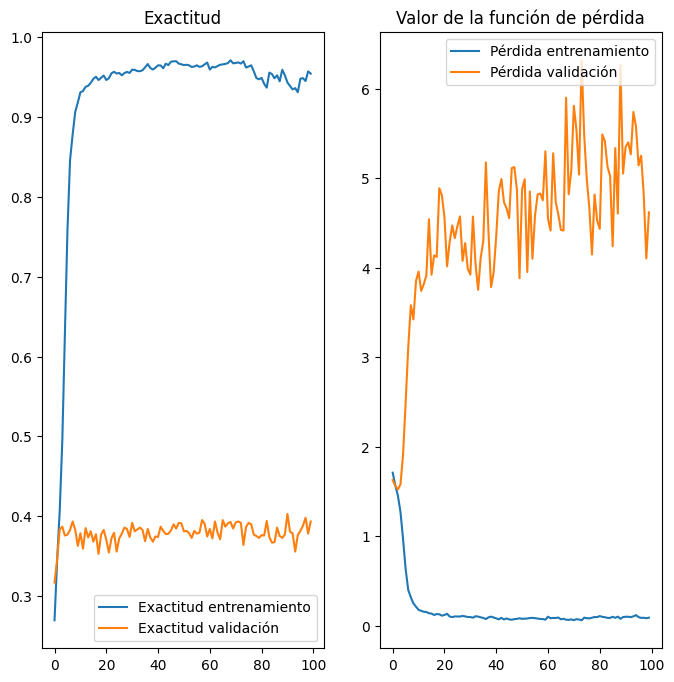

In [ ]:
# Visualización de la evolución del modelo sin aumento de datos
exactitud = evolucion.history['accuracy']
exactitud_val = evolucion.history['val_accuracy']

perdida = evolucion.history['loss']
perdida_val = evolucion.history['val_loss']

rango_epoca = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Sin el proceso de aumento de datos, se observa mediante la exactitud y la pérdida que el modelo ha dejado de generalizar debido a que se empieza a ajustar más y más al conjunto de entrenamiento.

### Intento 2: entrenamiento agregando un proceso de aumento de datos

In [ ]:
# Entrenar el modelo con aumento de datos
redConv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Convertir el conjunto de entrenamiento a NumPy arrays
# Primero, obtener todas las imágenes y etiquetas del conjunto de entrenamiento
x_train = []
y_train = []
for images, labels in conj_entrenamiento:
    x_train.extend(images.numpy())
    y_train.extend(labels.numpy())

# Convertir las listas a NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

evolucion_ad = redConv.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=100, batch_size=32)

Epoch 1/100
213/213 [==============================] - 98s 454ms/step - loss: 1.7661 - accuracy: 0.2970 - val_loss: 1.5480 - val_accuracy: 0.3816
Epoch 2/100
213/213 [==============================] - 96s 450ms/step - loss: 1.6064 - accuracy: 0.3360 - val_loss: 1.5189 - val_accuracy: 0.3928
Epoch 3/100
213/213 [==============================] - 95s 445ms/step - loss: 1.5825 - accuracy: 0.3526 - val_loss: 1.4954 - val_accuracy: 0.4223
Epoch 4/100
213/213 [==============================] - 95s 443ms/step - loss: 1.5473 - accuracy: 0.3676 - val_loss: 1.4695 - val_accuracy: 0.4311
Epoch 5/100
213/213 [==============================] - 95s 444ms/step - loss: 1.5265 - accuracy: 0.3841 - val_loss: 1.4384 - val_accuracy: 0.4382
Epoch 6/100
213/213 [==============================] - 95s 445ms/step - loss: 1.5068 - accuracy: 0.3841 - val_loss: 1.4274 - val_accuracy: 0.4588
Epoch 7/100
213/213 [==============================] - 95s 447ms/step - loss: 1.4792 - accuracy: 0.4091 - val_loss: 1.4103 -

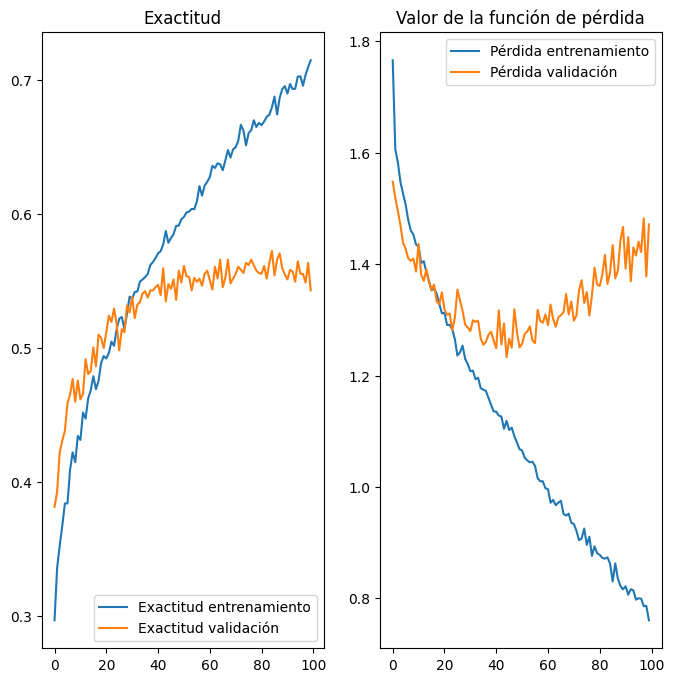

In [ ]:
# Visualización de la evolución del modelo
exactitud = evolucion_ad.history['accuracy']
exactitud_val = evolucion_ad.history['val_accuracy']

perdida = evolucion_ad.history['loss']
perdida_val = evolucion_ad.history['val_loss']

rango_epoca = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Con el proceso de aumento de datos, se observa mediante la exactitud y la pérdida que el modelo mejora, sin embargo después de la época 25 aproximadamente se empieza a ajustar más y más al conjunto de entrenamiento.

### Intento 3: ajustes a la arquitectura de red y al optimizador

In [10]:
# Ajustes a la arquitectura de la red
redConv_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(alto_img,ancho_img,3)), # capa de entrada (con normalización y shape de los pixeles)
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid'), # inician capas de extracción de patrones locales
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.GlobalAveragePooling2D(), # Global Avg Pooling en vez de flatten
    tf.keras.layers.Dense(512, activation="relu"), # inician capas densas de clasificación
    tf.keras.layers.Dropout(0.5), # 50% de desactivación de neuronas
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5), # 50% de desactivación de neuronas
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6,activation='softmax') # capa de salida (considera 6 clases)
])

redConv_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 96)       

In [11]:
# Learning rate scheduler en el optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Entrenar el modelo con aumento de datos
redConv_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

evolucion_red_2 = redConv_2.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=20, batch_size=32)

Epoch 1/20
213/213 [==============================] - 79s 365ms/step - loss: 1.7815 - accuracy: 0.2200 - val_loss: 1.7660 - val_accuracy: 0.2403
Epoch 2/20
213/213 [==============================] - 79s 368ms/step - loss: 1.7333 - accuracy: 0.2461 - val_loss: 1.7051 - val_accuracy: 0.2939
Epoch 3/20
213/213 [==============================] - 79s 372ms/step - loss: 1.7003 - accuracy: 0.2831 - val_loss: 1.6880 - val_accuracy: 0.2998
Epoch 4/20
213/213 [==============================] - 78s 366ms/step - loss: 1.6804 - accuracy: 0.2983 - val_loss: 1.6607 - val_accuracy: 0.2892
Epoch 5/20
213/213 [==============================] - 79s 371ms/step - loss: 1.6636 - accuracy: 0.3042 - val_loss: 1.6647 - val_accuracy: 0.3039
Epoch 6/20
213/213 [==============================] - 79s 369ms/step - loss: 1.6410 - accuracy: 0.3121 - val_loss: 1.6140 - val_accuracy: 0.3221
Epoch 7/20
213/213 [==============================] - 79s 370ms/step - loss: 1.6226 - accuracy: 0.3229 - val_loss: 1.5809 - val_ac

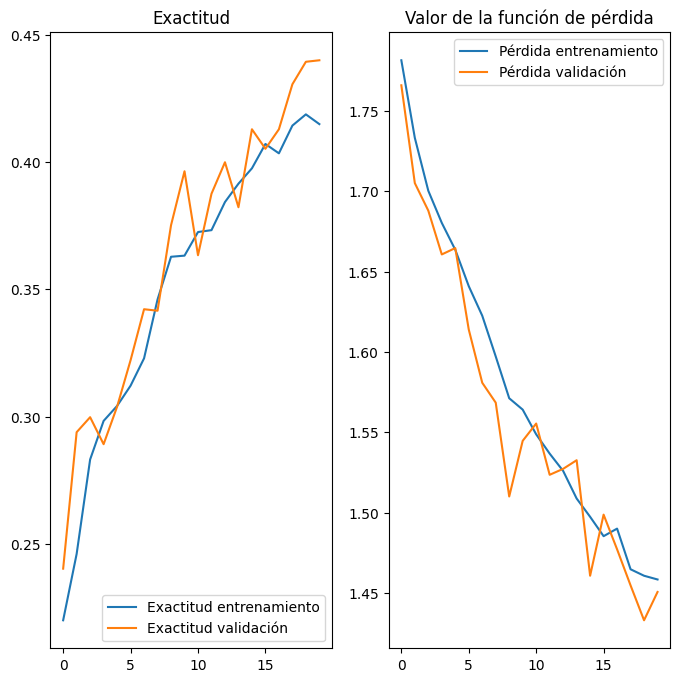

In [13]:
# Visualización de la evolución del modelo
exactitud = evolucion_red_2.history['accuracy']
exactitud_val = evolucion_red_2.history['val_accuracy']

perdida = evolucion_red_2.history['loss']
perdida_val = evolucion_red_2.history['val_loss']

rango_epoca = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Con los ajustes en la arquitectura, se observa mediante la exactitud y la pérdida que no hay un sobreajuste, sin embargo la exactitud sigue con valores debajo de lo aceptable (menos del 45%).

In [16]:
# Análisis de rendimiento por clase
from sklearn.metrics import classification_report

# Convertir el conjunto de prueba a NumPy arrays
# Primero, obtener todas las imágenes y etiquetas del conjunto de prueba
x_test = []
y_test = []
for images, labels in conj_prueba:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())

# Convertir las listas a NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Análisis
y_pred = redConv_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

54/54 [==============================] - 4s 70ms/step
              precision    recall  f1-score   support

           0       0.37      0.54      0.44       277
           1       0.69      0.09      0.16       224
           2       0.47      0.18      0.26       245
           3       0.72      0.51      0.60       312
           4       0.41      0.68      0.51       373
           5       0.36      0.45      0.40       267

    accuracy                           0.44      1698
   macro avg       0.50      0.41      0.40      1698
weighted avg       0.50      0.44      0.42      1698



### Intento 4: cambio a otro optimizador

In [18]:
# Ajuste en el optimizer
optimizer_2 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Entrenar el modelo con aumento de datos
redConv_2.compile(optimizer=optimizer_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

evolucion_red_2 = redConv_2.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=20, batch_size=32)

Epoch 1/20
213/213 [==============================] - 79s 368ms/step - loss: 1.5275 - accuracy: 0.3881 - val_loss: 1.5214 - val_accuracy: 0.4240
Epoch 2/20
213/213 [==============================] - 77s 360ms/step - loss: 1.4836 - accuracy: 0.4053 - val_loss: 1.4660 - val_accuracy: 0.4323
Epoch 3/20
213/213 [==============================] - 78s 365ms/step - loss: 1.4676 - accuracy: 0.4144 - val_loss: 1.5208 - val_accuracy: 0.4016
Epoch 4/20
213/213 [==============================] - 78s 367ms/step - loss: 1.4517 - accuracy: 0.4230 - val_loss: 1.4332 - val_accuracy: 0.4388
Epoch 5/20
213/213 [==============================] - 79s 370ms/step - loss: 1.4387 - accuracy: 0.4343 - val_loss: 1.4879 - val_accuracy: 0.4052
Epoch 6/20
213/213 [==============================] - 79s 369ms/step - loss: 1.4513 - accuracy: 0.4299 - val_loss: 1.4569 - val_accuracy: 0.4311
Epoch 7/20
213/213 [==============================] - 79s 371ms/step - loss: 1.4352 - accuracy: 0.4302 - val_loss: 1.4404 - val_ac

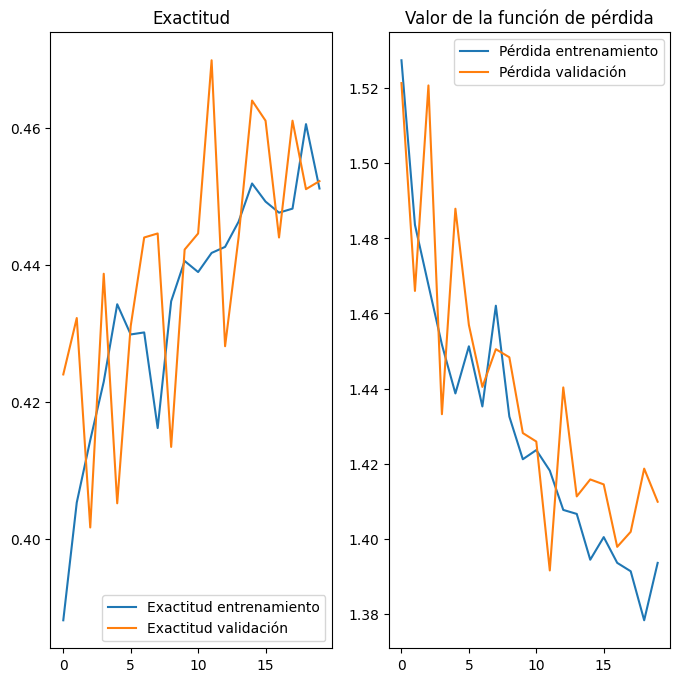

In [19]:
# Visualización de la evolución del modelo
exactitud = evolucion_red_2.history['accuracy']
exactitud_val = evolucion_red_2.history['val_accuracy']

perdida = evolucion_red_2.history['loss']
perdida_val = evolucion_red_2.history['val_loss']

rango_epoca = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Con los ajustes en el optimizer, se observa mediante la exactitud y la pérdida que no hay un sobreajuste, sin embargo la exactitud sigue con valores debajo de lo aceptable y no hay mucho cambio en los indicadores a través de las épocas.

In [20]:
# Captación previa
AUTOTUNE = tf.data.AUTOTUNE
conj_entrenamiento = conj_entrenamiento.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
conj_prueba = conj_prueba.cache().prefetch(buffer_size=AUTOTUNE)

### Intento 5: ajustes a la arquitectura de red (se incluyen más capas)

In [22]:
# Ajustes a la arquitectura de la red
redConv_3 = tf.keras.Sequential([
    # Preprocesamiento: normalización
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(alto_img, ancho_img, 3)),

    # Bloque 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 3
    tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 5
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Clasificación
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6, activation='softmax')
])

redConv_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_19 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 112, 112, 32)     

In [23]:
# Learning rate scheduler en el optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9
)

# Ajuste en el optimizer
optimizer_3 = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Entrenar el modelo con aumento de datos
redConv_3.compile(optimizer=optimizer_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

evolucion_red_3 = redConv_3.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
213/213 [==============================] - 296s 1s/step - loss: 1.8239 - accuracy: 0.1969 - val_loss: 1.7987 - val_accuracy: 0.1572
Epoch 2/50
213/213 [==============================] - 282s 1s/step - loss: 1.7646 - accuracy: 0.2235 - val_loss: 1.8017 - val_accuracy: 0.2008
Epoch 3/50
213/213 [==============================] - 283s 1s/step - loss: 1.7387 - accuracy: 0.2419 - val_loss: 1.7229 - val_accuracy: 0.2609
Epoch 4/50
213/213 [==============================] - 283s 1s/step - loss: 1.7173 - accuracy: 0.2509 - val_loss: 1.6874 - val_accuracy: 0.2939
Epoch 5/50
213/213 [==============================] - 284s 1s/step - loss: 1.7087 - accuracy: 0.2608 - val_loss: 1.6796 - val_accuracy: 0.3004
Epoch 6/50
213/213 [==============================] - 284s 1s/step - loss: 1.6935 - accuracy: 0.2740 - val_loss: 1.6595 - val_accuracy: 0.2951
Epoch 7/50
213/213 [==============================] - 282s 1s/step - loss: 1.6833 - accuracy: 0.2858 - val_loss: 1.6438 - val_accuracy: 0.3257

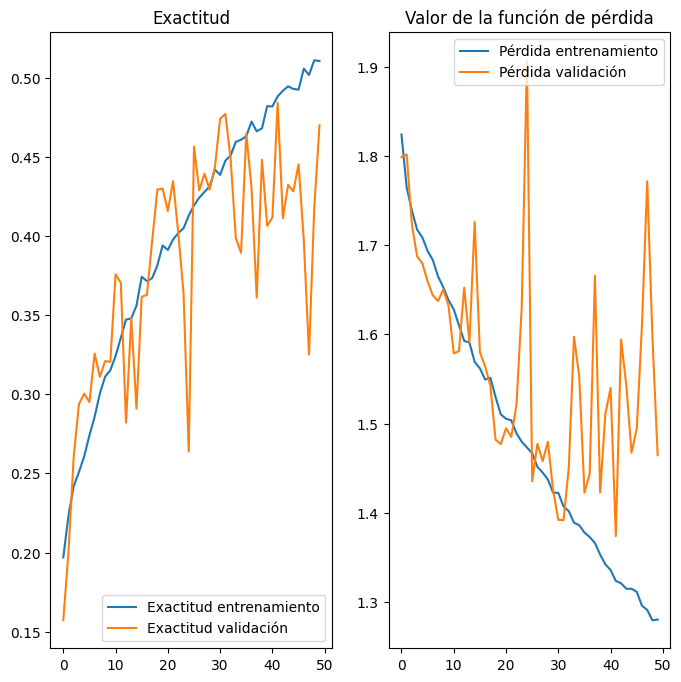

In [24]:
# Visualización de la evolución del modelo
exactitud = evolucion_red_3.history['accuracy']
exactitud_val = evolucion_red_3.history['val_accuracy']

perdida = evolucion_red_3.history['loss']
perdida_val = evolucion_red_3.history['val_loss']

rango_epoca = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Con los ajustes en la arquitectura de la red, se observa mediante la exactitud y la pérdida que la exactitud sigue con valores debajo de lo aceptable y además mantiene una oscilación considerable a través de las épocas.

### Intento 6: ajustes a la arquitectura de red (se disminuyen nuevamente las capas)

In [25]:
# Ajustes a la arquitectura de la red
redConv_4 = tf.keras.Sequential([
    # Preprocesamiento: normalización
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(alto_img, ancho_img, 3)),

    # Bloque 1: Capa convolucional simple con MaxPooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 2: Capa convolucional adicional
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Bloque 3: Capa convolucional final
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Clasificación
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 clases de salida
])

redConv_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 56, 56, 128)      

In [26]:
# Learning rate scheduler en el optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9
)

# Ajuste en el optimizer
optimizer_3 = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Entrenar el modelo con aumento de datos
redConv_4.compile(optimizer=optimizer_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

evolucion_red_4 = redConv_4.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
213/213 [==============================] - 78s 362ms/step - loss: 1.7874 - accuracy: 0.1863 - val_loss: 1.7772 - val_accuracy: 0.2197
Epoch 2/50
213/213 [==============================] - 76s 355ms/step - loss: 1.7794 - accuracy: 0.2197 - val_loss: 1.7750 - val_accuracy: 0.2197
Epoch 3/50
213/213 [==============================] - 77s 362ms/step - loss: 1.7783 - accuracy: 0.2188 - val_loss: 1.7744 - val_accuracy: 0.2197
Epoch 4/50
213/213 [==============================] - 76s 356ms/step - loss: 1.7757 - accuracy: 0.2194 - val_loss: 1.7737 - val_accuracy: 0.2197
Epoch 5/50
213/213 [==============================] - 76s 355ms/step - loss: 1.7751 - accuracy: 0.2199 - val_loss: 1.7730 - val_accuracy: 0.2197
Epoch 6/50
213/213 [==============================] - 76s 358ms/step - loss: 1.7730 - accuracy: 0.2199 - val_loss: 1.7719 - val_accuracy: 0.2197
Epoch 7/50
213/213 [==============================] - 76s 353ms/step - loss: 1.7743 - accuracy: 0.2199 - val_loss: 1.7719 - val_ac

El valor de la exactitud es muy bajo (22%) y no cambia a través de las épocas.

### Intento 7: ajustes a la arquitectura de red y optimizador

In [27]:
# Ajustes a la arquitectura de la red
redConv_5 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(alto_img,ancho_img,3)), # capa de entrada (con normalización y shape de los pixeles)
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid'), # inician capas de extracción de patrones locales
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation="relu"), # inician capas densas de clasificación
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6,activation='softmax') # capa de salida (considera 6 clases)
])

redConv_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 52, 52, 96)       

In [29]:
# Learning rate scheduler en el optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

# Ajuste en el optimizer
optimizer_4 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Entrenar el modelo con aumento de datos
redConv_5.compile(optimizer=optimizer_4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

evolucion_red_5 = redConv_5.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
213/213 [==============================] - 75s 348ms/step - loss: 1.7792 - accuracy: 0.2182 - val_loss: 1.7725 - val_accuracy: 0.2197
Epoch 2/50
213/213 [==============================] - 74s 345ms/step - loss: 1.7636 - accuracy: 0.2268 - val_loss: 1.7460 - val_accuracy: 0.2432
Epoch 3/50
213/213 [==============================] - 74s 348ms/step - loss: 1.7159 - accuracy: 0.2565 - val_loss: 1.6940 - val_accuracy: 0.2850
Epoch 4/50
213/213 [==============================] - 75s 349ms/step - loss: 1.6868 - accuracy: 0.2834 - val_loss: 1.6836 - val_accuracy: 0.2792
Epoch 5/50
213/213 [==============================] - 73s 344ms/step - loss: 1.6711 - accuracy: 0.2965 - val_loss: 1.6794 - val_accuracy: 0.3110
Epoch 6/50
213/213 [==============================] - 75s 350ms/step - loss: 1.6552 - accuracy: 0.3148 - val_loss: 1.6903 - val_accuracy: 0.3074
Epoch 7/50
213/213 [==============================] - 76s 356ms/step - loss: 1.6544 - accuracy: 0.3167 - val_loss: 1.6913 - val_ac

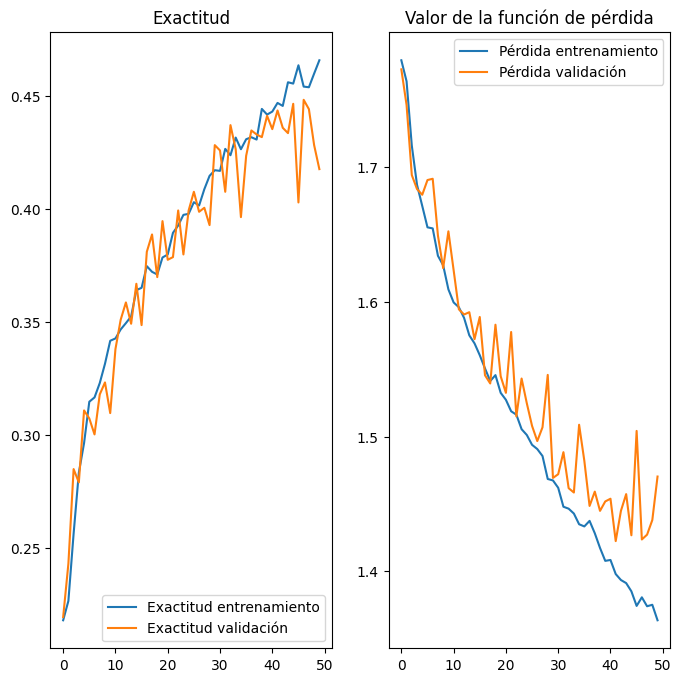

In [30]:
# Visualización de la evolución del modelo
exactitud = evolucion_red_5.history['accuracy']
exactitud_val = evolucion_red_5.history['val_accuracy']

perdida = evolucion_red_5.history['loss']
perdida_val = evolucion_red_5.history['val_loss']

rango_epoca = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

En los gráficos de los indicadores se observa un buen comportamiento o tendencias, sin embargo el valor de la exactitud aún tiene mucha oportunidad (menos del 45%).

### Modelo final desde cero con mejor comportamiento: Intento 2

Se observó el mejor comportamiento en la exactitud y pérdida en el modelo de la sección del intento 2, que fue realmente la primera red generada (redConv), e incluyendo el proceso de aumento de datos.

Adicionalmente ahora se ajustan hiperparámetros como el learning rate, y las épocas se controlan mediante un early stopping con base en el valor de la exactitud para no exceder las épocas de lo más óptimo.

In [56]:
# Learning rate scheduler en el optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

# Ajuste en el optimizer
optimizer_4 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrenar el modelo con aumento de datos
redConv.compile(optimizer= optimizer_4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
evolucion_red_intento2 = redConv.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data = conj_prueba, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
213/213 [==============================] - 97s 448ms/step - loss: 1.2066 - accuracy: 0.5366 - val_loss: 1.2866 - val_accuracy: 0.5212
Epoch 2/50
213/213 [==============================] - 96s 448ms/step - loss: 1.1890 - accuracy: 0.5453 - val_loss: 1.2856 - val_accuracy: 0.5230
Epoch 3/50
213/213 [==============================] - 94s 441ms/step - loss: 1.1708 - accuracy: 0.5472 - val_loss: 1.2876 - val_accuracy: 0.5289
Epoch 4/50
213/213 [==============================] - 94s 440ms/step - loss: 1.1784 - accuracy: 0.5432 - val_loss: 1.2697 - val_accuracy: 0.5271
Epoch 5/50
213/213 [==============================] - 94s 441ms/step - loss: 1.1708 - accuracy: 0.5391 - val_loss: 1.2759 - val_accuracy: 0.5218
Epoch 6/50
213/213 [==============================] - 101s 472ms/step - loss: 1.1688 - accuracy: 0.5448 - val_loss: 1.2725 - val_accuracy: 0.5300
Epoch 7/50
213/213 [==============================] - 101s 475ms/step - loss: 1.1461 - accuracy: 0.5525 - val_loss: 1.2795 - val_

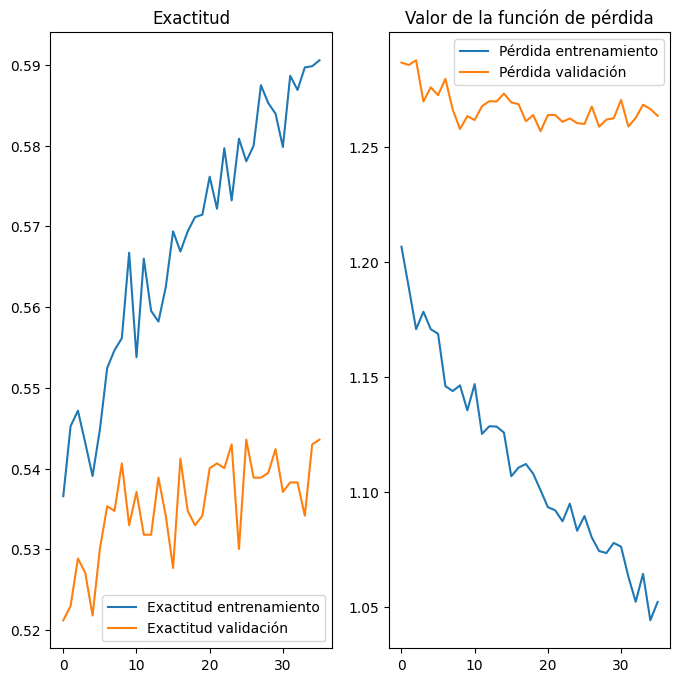

In [57]:
# Visualización de la evolución del modelo
exactitud = evolucion_red_intento2.history['accuracy']
exactitud_val = evolucion_red_intento2.history['val_accuracy']

perdida = evolucion_red_intento2.history['loss']
perdida_val = evolucion_red_intento2.history['val_loss']

rango_epoca = range(36)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

Al analizar los gráficos se observa una aparente separación entre el comportamiento del conjunto de entrenamiento y validación en ambos indicadores, sin embargo, este efecto es debido a que las magnitudes de los valores a lo largo de las épocas no varían mucho, y provoca este efecto como de "zoom".

In [58]:
# Exportación del modelo como archivo h5 (formato de datos jerárquico)
redConv.save('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/modelo_desde_cero_redconv.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Diseñar un modelo utilizando una red neuronal convolucional utilizando un modelo pre-entrenado.

In [31]:
# Generar la arquitectura de la red
modelo_base = tf.keras.applications.MobileNetV2(
  input_shape=(alto_img,ancho_img,3),
  include_top= False,
  weights='imagenet'
)
modelo_base.trainable = False
modelo_final = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(alto_img,ancho_img,3)), # capa de entrada (con normalización y shape de los pixeles)
    modelo_base, # modelo pre-entrenado para la extracción de patrones locales
    tf.keras.layers.GlobalAveragePooling2D(), # capa para obtener promedio global del pooling
    tf.keras.layers.Dense(6,activation='softmax') # capa de salida (considera 6 clases)
])

modelo_final.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_28 (Dense)            (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________

In [32]:
# Configuración de hiperparámetros asociados a la red (optimizador, función de pérdida y métrica de evaluación)
tasa_aprendizaje_base = 0.0001 # tasa pequeña de aprendizaje para no generar grandes cambios en los pesos de la última capa (ajuste fino)
modelo_final.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=tasa_aprendizaje_base), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

evolucion_mpre = modelo_final.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data = conj_prueba, epochs=70, batch_size=64, callbacks=[early_stopping])

Epoch 1/70
107/107 [==============================] - 69s 635ms/step - loss: 1.8866 - accuracy: 0.2174 - val_loss: 1.6746 - val_accuracy: 0.3216
Epoch 2/70
107/107 [==============================] - 68s 636ms/step - loss: 1.5892 - accuracy: 0.3650 - val_loss: 1.4595 - val_accuracy: 0.4452
Epoch 3/70
107/107 [==============================] - 71s 658ms/step - loss: 1.4292 - accuracy: 0.4499 - val_loss: 1.3398 - val_accuracy: 0.5118
Epoch 4/70
107/107 [==============================] - 70s 654ms/step - loss: 1.3338 - accuracy: 0.4918 - val_loss: 1.2601 - val_accuracy: 0.5383
Epoch 5/70
107/107 [==============================] - 68s 638ms/step - loss: 1.2767 - accuracy: 0.5138 - val_loss: 1.2100 - val_accuracy: 0.5607
Epoch 6/70
107/107 [==============================] - 69s 642ms/step - loss: 1.2343 - accuracy: 0.5375 - val_loss: 1.1716 - val_accuracy: 0.5783
Epoch 7/70
107/107 [==============================] - 68s 637ms/step - loss: 1.2093 - accuracy: 0.5450 - val_loss: 1.1492 - val_ac

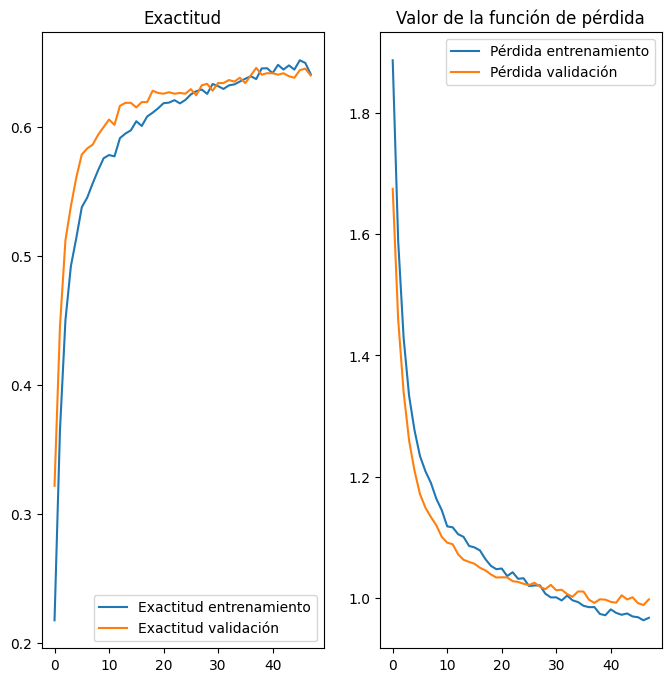

In [36]:
# Visualización de la evolución del modelo
exactitud = evolucion_mpre.history['accuracy']
exactitud_val = evolucion_mpre.history['val_accuracy']

perdida = evolucion_mpre.history['loss']
perdida_val = evolucion_mpre.history['val_loss']

rango_epoca = range(48)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Pérdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de pérdida')
plt.show()

In [47]:
# Exportación del modelo como archivo h5 (formato de datos jerárquico)
modelo_final.save('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/modelo_pre_entrenado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Generar un modelo utilizando la herramienta Teachable Machine.

### Preparación: Generar una biblioteca únicamente con las imágenes del conjunto de entrenamiento

In [37]:
import shutil

In [44]:
# Función para copiar imágenes del conjunto de entrenamiento
def copiar_imagenes_entrenamiento(dataset, directorio_origen, directorio_destino):
    # Iterar sobre los lotes del dataset
    for batch, labels in dataset:
        for img_array, label in zip(batch, labels):
            # Convertir la etiqueta en el nombre de la clase
            class_name = dataset.class_names[label.numpy()]

            # Encontrar el archivo en el directorio origen
            archivos_clase = list((directorio_origen / class_name).glob('*'))

            # Buscar un archivo con el contenido de la imagen
            for archivo in archivos_clase:
                # Saltar si ya fue copiado
                archivo_destino = os.path.join(directorio_destino, class_name, archivo.name)
                if os.path.exists(archivo_destino):
                    continue

                # Copiar la imagen al subdirectorio correspondiente
                subdirectorio_destino = os.path.join(directorio_destino, class_name)
                os.makedirs(subdirectorio_destino, exist_ok=True)
                shutil.copy(str(archivo), archivo_destino)
                print(f"Copiada: {archivo} -> {archivo_destino}")
                break

# Crear un nuevo directorio para almacenar las copias
directorio_destino = '/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_entrenamiento'
os.makedirs(directorio_destino, exist_ok=True)

# Llamar a la función para copiar las imágenes
copiar_imagenes_entrenamiento(conj_entrenamiento, DIR_FILTRADO, directorio_destino)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Copiada: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/helicoptero/00001005.jpeg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_entrenamiento/helicoptero/00001005.jpeg
Copiada: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/dron/00000928.jpeg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_entrenamiento/dron/00000928.jpeg
Copiada: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001214.jpeg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_entrenamiento/avion/00001214.jpeg
Copiada: /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos/objetos/filtrado/avion/00001221.jpeg -> /content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_e

In [46]:
# Contar imágenes conjunto entrenamiento
directorio_destino = pathlib.Path(directorio_destino)
conteo_img = len(list(directorio_destino.glob('*/*.*')))
conteo_img

6795

### Intento 1:

Se intentaron cargar las carpetas completas con todos los archivos de las imágenes del conjunto de entrenamiento, sin embargo al ser tantos documentos (alrededor de 1000 archivos por clase), el sitio de Teachable Machine se quedaba cargando por tiempos excesivos.

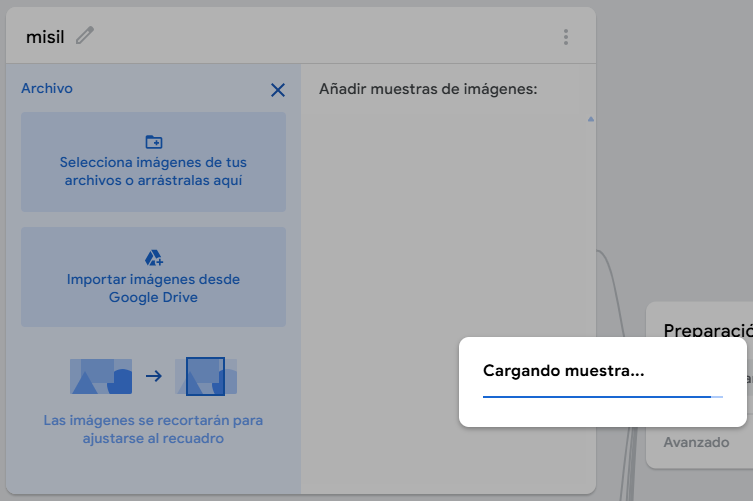

### Intento 2:

Se cargaron 30 archivos de muestra al azar por clase de la biblioteca de imágenes del conjunto de entrenamiento.

Se utilizaron los siguientes hiperparámetros:
* Épocas: 50
* Tamaño del lote: 32
* Tasa de aprendizaje: 0.001

Finalmente se exporta el modelo, obteniendo de resultado una capeta .zip con el archivo .h5 y las etiquetas en formato .txt, así como un código.

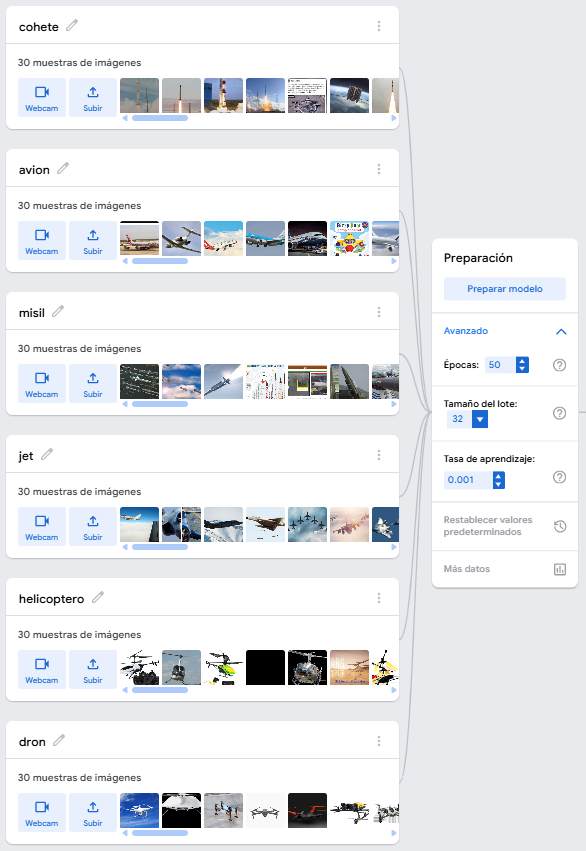

Código de Teachable Machine:

In [61]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/keras_model.h5', compile=False)

# Load the labels
class_names = open('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/labels.txt', 'r').readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/Base-de-datos/datos_entrenamiento/misil/00001248.jpeg' # no es parte de la muestra usada en teachable machine
image = Image.open(IMAGE_PATH).convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 468ms/step
Class: cohete
Confidence Score: 0.63785666


## Validar, evaluar y comparar los tres diferentes modelos generados y seleccionar el mejor considerando la exactitud como indicador de desempeño.

### Carga de los modelos previamente exportados

In [59]:
# Carga del modelo red desde cero
modelo_desde_cero_cargado = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/modelo_desde_cero_redconv.h5')

In [51]:
# Carga del modelo red pre entrenado
modelo_pre_entrenado_cargado = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/modelo_pre_entrenado.h5')

In [65]:
# Carga del modelo de Teachable Machine
modelo_tm = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL_tensorflow/Reto/keras_model.h5', compile=False)

### Evaluación de los indicadores de los modelos

In [66]:
# Evaluación del modelo red desde cero
perdida_prueba, exactitud_prueba = modelo_desde_cero_cargado.evaluate(conj_prueba,batch_size=tam_lote, verbose=1)

print(f"Pérdida en el conjunto de prueba: {perdida_prueba}")
print(f"Exactitud en el conjunto de prueba: {exactitud_prueba}")

54/54 [==============================] - 7s 113ms/step - loss: 1.2600 - accuracy: 0.5436
Pérdida en el conjunto de prueba: 1.259966254234314
Exactitud en el conjunto de prueba: 0.5435807108879089


In [67]:
# Evaluación del modelo red pre entrenado
perdida_prueba, exactitud_prueba = modelo_pre_entrenado_cargado.evaluate(conj_prueba,batch_size=tam_lote, verbose=1)

print(f"Pérdida en el conjunto de prueba: {perdida_prueba}")
print(f"Exactitud en el conjunto de prueba: {exactitud_prueba}")

54/54 [==============================] - 9s 148ms/step - loss: 0.9921 - accuracy: 0.6455
Pérdida en el conjunto de prueba: 0.9921184182167053
Exactitud en el conjunto de prueba: 0.6454652547836304


In [69]:
# Evaluación del modelo de Teachable Machine
# Compilación
tasa_aprendizaje_base = 0.0001 # tasa pequeña de aprendizaje para no generar grandes cambios en los pesos de la última capa (ajuste fino)
modelo_tm.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=tasa_aprendizaje_base), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

perdida_prueba, exactitud_prueba = modelo_tm.evaluate(conj_prueba,batch_size=tam_lote, verbose=1)

print(f"Pérdida en el conjunto de prueba: {perdida_prueba}")
print(f"Exactitud en el conjunto de prueba: {exactitud_prueba}")

54/54 [==============================] - 7s 97ms/step - loss: 4.4642 - accuracy: 0.1148
Pérdida en el conjunto de prueba: 4.464169979095459
Exactitud en el conjunto de prueba: 0.11484099179506302


### Análisis de rendimiento por clase

In [75]:
class_names

['0 cohete\n',
 '1 avion\n',
 '2 misil\n',
 '3 jet\n',
 '4 helicoptero\n',
 '5 dron\n']

In [70]:
# Modelo red desde cero
from sklearn.metrics import classification_report

y_pred = modelo_desde_cero_cargado.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

54/54 [==============================] - 4s 69ms/step
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       277
           1       0.62      0.37      0.46       224
           2       0.51      0.52      0.51       245
           3       0.77      0.71      0.73       312
           4       0.48      0.63      0.54       373
           5       0.50      0.37      0.43       267

    accuracy                           0.54      1698
   macro avg       0.56      0.53      0.53      1698
weighted avg       0.56      0.54      0.54      1698



In [71]:
# Modelo red pre entrenado
from sklearn.metrics import classification_report

y_pred = modelo_pre_entrenado_cargado.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

54/54 [==============================] - 8s 134ms/step
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       277
           1       0.57      0.42      0.48       224
           2       0.68      0.63      0.65       245
           3       0.84      0.79      0.82       312
           4       0.52      0.72      0.60       373
           5       0.70      0.57      0.63       267

    accuracy                           0.65      1698
   macro avg       0.66      0.63      0.64      1698
weighted avg       0.66      0.65      0.64      1698



In [72]:
# Modelo de Teachable machine
from sklearn.metrics import classification_report

y_pred = modelo_tm.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

54/54 [==============================] - 3s 49ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       277
           1       0.12      0.64      0.20       224
           2       0.11      0.20      0.15       245
           3       0.00      0.00      0.00       312
           4       0.00      0.00      0.00       373
           5       0.08      0.01      0.01       267

    accuracy                           0.11      1698
   macro avg       0.05      0.14      0.06      1698
weighted avg       0.04      0.11      0.05      1698



### Predicciones de imágenes

54/54 [==============================] - 7s 115ms/step
Vector de salida de la red:  [0.5825131  0.00003977 0.27670702 0.00221192 0.13843155 0.0000967 ]
Indice del argumento mayor:  0
Predicción de la clase que genera el modelo:  avion
Clase real a la que pertenece la imagen:  dron


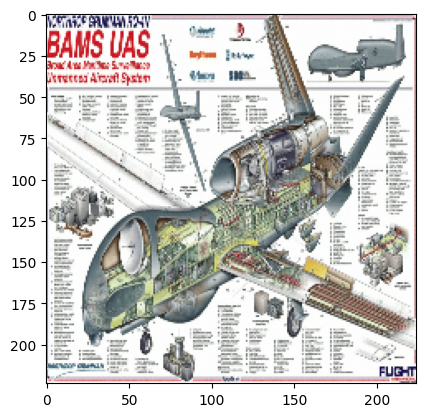

In [76]:
# Modelo red desde cero
predicciones = modelo_desde_cero_cargado.predict(conj_prueba)
print("Vector de salida de la red: " ,predicciones[20])
print("Indice del argumento mayor: ", np.argmax(predicciones[20]))
print("Predicción de la clase que genera el modelo: ",
nombre_clases[np.argmax(predicciones[20])])
for lote_img, lote_etq in conj_prueba:
  plt.figure()
  plt.imshow(lote_img[20].numpy().astype(np.uint8))
  print("Clase real a la que pertenece la imagen: ", nombre_clases[lote_etq[20]])
  break

54/54 [==============================] - 10s 178ms/step
Vector de salida de la red:  [0.00401831 0.14160514 0.01044967 0.00160018 0.02542312 0.81690353]
Indice del argumento mayor:  5
Predicción de la clase que genera el modelo:  misil
Clase real a la que pertenece la imagen:  jet


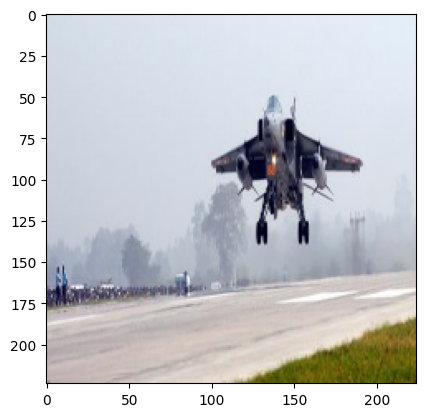

In [77]:
# Modelo red pre entenado
predicciones = modelo_pre_entrenado_cargado.predict(conj_prueba)
print("Vector de salida de la red: " ,predicciones[20])
print("Indice del argumento mayor: ", np.argmax(predicciones[20]))
print("Predicción de la clase que genera el modelo: ",
nombre_clases[np.argmax(predicciones[20])])
for lote_img, lote_etq in conj_prueba:
  plt.figure()
  plt.imshow(lote_img[20].numpy().astype(np.uint8))
  print("Clase real a la que pertenece la imagen: ", nombre_clases[lote_etq[20]])
  break

54/54 [==============================] - 6s 97ms/step
Vector de salida de la red:  [0.00092836 0.5571485  0.38226053 0.01239469 0.00847206 0.03879583]
Indice del argumento mayor:  1
Predicción de la clase que genera el modelo:  cohete
Clase real a la que pertenece la imagen:  helicoptero


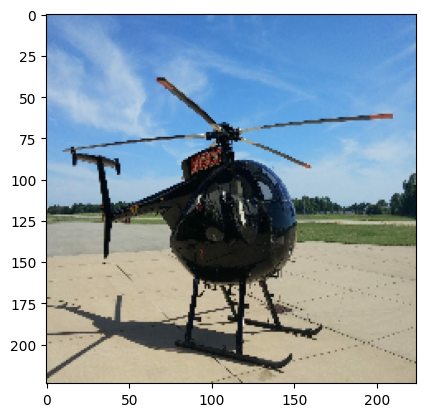

In [78]:
# Modelo de Teachable Machine
predicciones = modelo_tm.predict(conj_prueba)
print("Vector de salida de la red: " ,predicciones[20])
print("Indice del argumento mayor: ", np.argmax(predicciones[20]))
print("Predicción de la clase que genera el modelo: ",
nombre_clases[np.argmax(predicciones[20])])
for lote_img, lote_etq in conj_prueba:
  plt.figure()
  plt.imshow(lote_img[20].numpy().astype(np.uint8))
  print("Clase real a la que pertenece la imagen: ", nombre_clases[lote_etq[20]])
  break

### Selección del mejor modelo

Posterior al análisis de los indicadores en los tres modelos finales generados:
1. Modelo desde cero (exactitud: 54.36%)
2. Modelo pre entrenado (exactitud: 64.55%)
3. Modelo de Teachable Machine (exactitud: 11.48%)

* Se decidió seleccionar como el mejor modelo aquel que utiliza un componente pre-entrenado para la extracción de patrones locales, ya que alcanzó la exactitud más alta, cercana al 65%.

  Además, la gráfica de evolución del entrenamiento de este modelo muestra un desempeño consistente y una generalización adecuada.

* En cuanto al modelo diseñado desde cero, se probaron múltiples combinaciones de arquitecturas, ajustes en hiperparámetros y optimizadores. Sin embargo, no se logró superar una exactitud del 54%. Aunque es posible mejorar este resultado, ello requeriría iterar con muchas más configuraciones y escenarios, lo cual implicaría una inversión de tiempo significativamente mayor. Este es un factor importante a considerar en este tipo de proyectos.

* El modelo de Teachable Machine, por otro lado, obtuvo una exactitud muy baja, alrededor del 11%. Sin embargo, esta comparación no es completamente justa, ya que el modelo no pudo entrenarse con todo el conjunto de imágenes utilizado en los otros modelos debido a las limitaciones de carga en la plataforma. Esta herramienta es más adecuada para pruebas de concepto y, para mejorar su desempeño, sería necesario seleccionar cuidadosamente una muestra de imágenes de alta calidad y variabilidad.

En conclusión, para proyectos reales, utilizar **modelos pre-entrenados** es una estrategia eficaz que permite ahorrar tiempo y aprovechar recursos y conocimientos previos desarrollados por otros expertos. También se destacó que la calidad de las imágenes es un aspecto crucial: en la base de datos utilizada se observó la presencia de imágenes que no reflejan situaciones reales, como caricaturas e infografías. En un proyecto real, sería fundamental invertir tiempo en asegurar que las imágenes sean representativas antes de avanzar al desarrollo. Finalmente, aunque el modelo seleccionado tiene oportunidades de mejora, estas probablemente requerirán un enfoque más detallado, especialmente en la calidad de los datos utilizados.